# Laser Detection for one Order
Run the laser detection algorithm of one order of one star.
Use this script for debugging and running on a small scale.

In [191]:
import astropy.io.fits as fits
import matplotlib.pylab as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
import math
from mpmath import mp
import os
import os.path 
import random
from random import seed
from random import choice

## Signal Injection
First two functions cpied from Anna Zuckerman's Github repository: https://github.com/annazuckerman/specmatch-emp-apf

In [192]:
mp.dps=100
exp_array = np.frompyfunc(mp.exp, 1, 1)

# function to insert simulated gaussians
def insert_gaussian(spectrum, gaussian_params, midpoint, numpoints):
    height = gaussian_params[0]
    position = gaussian_params[1] #position within segment, not index in spectrum
    FWHM = gaussian_params[2]
    offset = gaussian_params[3]
    x = np.linspace(0,numpoints-1,numpoints) # numpoints must be odd            #### why does this start at 0?
    gauss = gaussian(x,height,position,FWHM/(2*np.sqrt(2*np.log(2))),offset)
    new_spect = spectrum.copy()
    new_spect[midpoint - math.floor(numpoints/2):midpoint + math.floor(numpoints/2)] = gauss
    return new_spect
    
def gaussian(x,a,b,c,d): # a = height, b = position of peak, c = width, x = numpy array of x values
    f = a*exp_array((-(x-b)**2)/(2*c)**2) + d
    return f 

def chi(model, data):
    '''given two arrays of the same length, calculate chi-squared'''
    return np.sum((data - model) ** 2)

In [193]:
cd /mnt_home/azuckerman/APF_spectra/NDR_corrected_wl_scale

/mnt_home/azuckerman/APF_spectra/NDR_corrected_wl_scale


## Read in Reduced Data from Anna Zuckerman's repo

In [201]:
plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 20})

directory = '/mnt_home/azuckerman/APF_spectra/NDR_corrected_wl_scale'

# every file in Anna's NDR_corrected_wl_scale folder
list_of_files = []
for filename in os.listdir(directory):
    if filename.endswith(".fits"): 
        file_path = os.path.join(directory, filename)
        list_of_files = np.append(list_of_files, file_path)
        
# Choose one star from list of all stars
which_star = 0
APF_flux_path = list_of_files[which_star]

file = fits.open(APF_flux_path)
flux = file[0].data
wl = file[1].data

header = file[0].header
star = header['TOBJECT']
order = 5

print('File path: ' + APF_flux_path)
print('Star: ' + star)
print('Order: ' + str(order))

# truncate wavelenght and flux for testing purposes
wl = wl[:4100]
flux = flux[:4100]

File path: /mnt_home/azuckerman/APF_spectra/NDR_corrected_wl_scale/ramq.233.NDR.fits
Star: HIP12444
Order: 5


In [202]:
# plt.rcParams["figure.figsize"] = (18,12)
# plt.rcParams.update({'font.size': 20})

# APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
# directory = '/mnt_home/azuckerman/APF_spectra/NDR'

# # every file in Anna's NDR folder
# list_of_files = []
# for filename in os.listdir(directory):
#     if filename.endswith(".fits"): 
#         file_path = os.path.join(directory, filename)
#         list_of_files = np.append(list_of_files, file_path)
        
# # Choose one star from list of all stars
# which_star = 0
# APF_flux_path = list_of_files[which_star]

# wl_file = fits.open(APF_wavelength_path)
# wl_image = wl_file[0].data
# fl_file = fits.open(APF_flux_path)
# fl = fl_file[0].data
# header = fl_file[0].header
# star = header['TOBJECT']
# order = 5

# print('File path: ' + APF_flux_path)
# print('Star: ' + star)
# print('Order: ' + str(order))

## Set parameters

In [203]:
plot = True
save_figs = False
inject_signals = True
random_injections = False
threshold_testing = True

In [204]:
if threshold_testing == True:
    heights = []
    widths = []
    indicies = []
    recovered_widths = []
    recovered_heights = []
    recovered_indicies = []

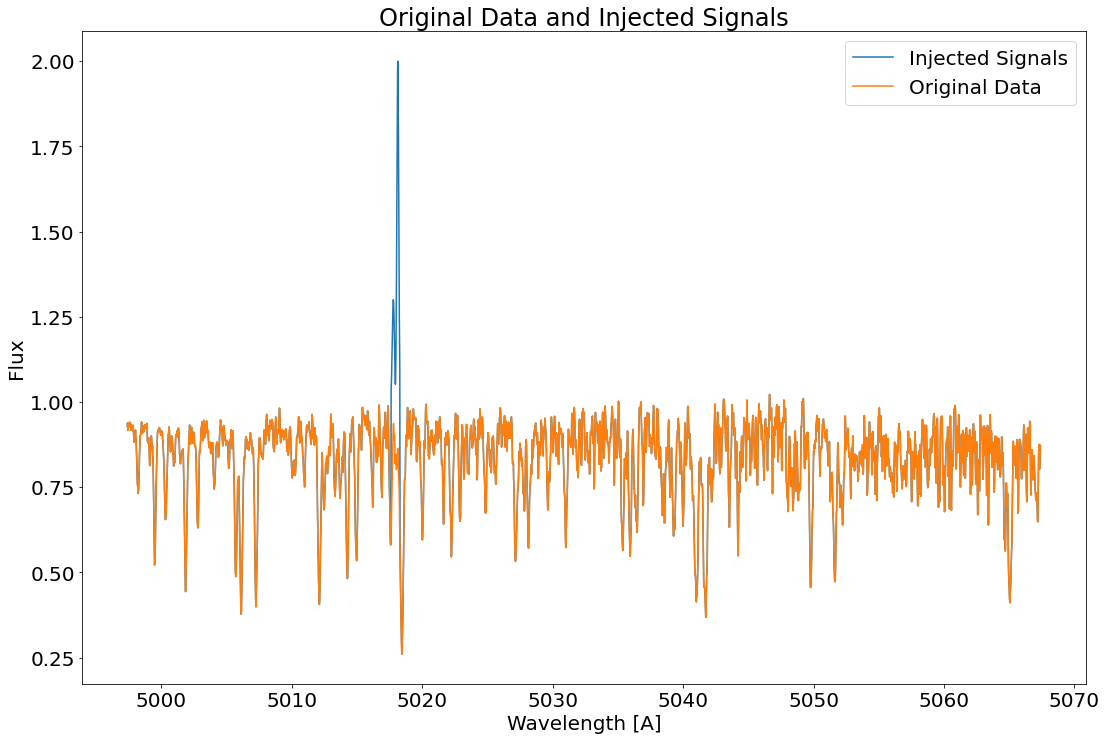

In [205]:
# wl = wl_image[order][4:-3]
# flux = fl[order]
spect = flux

if inject_signals == True:
    if random_injections == True:
        # insert injections
        for i in np.arange(10):
            random_val = np.random.choice(flux[100:-100], size = 1)
            location = flux.tolist().index(random_val)
            height = choice(np.arange(0.1, 6, 0.1).tolist())
            width = choice(np.arange(1, 10, 0.1).tolist())
            if width > 8:
                spect = insert_gaussian(spect,[height, 15, width, 1], location, 30)
            elif width > 5:
                spect = insert_gaussian(spect,[height, 10, width, 1], location, 20)
            elif width > 2:
                spect = insert_gaussian(spect,[height, 7, width, 1], location, 10)
            else:
                spect = insert_gaussian(spect,[height, 4, width, 0.9], location, 10)
            heights = np.append(heights, height)
            widths = np.append(widths, width)
            indicies = np.append(indicies, location)
    else:
#         spect = insert_gaussian(spect,[0.5, 15, 10, 1], 400, 30)
#         spect = insert_gaussian(spect,[1, 15, 9, 1], 800, 30)
        spect = insert_gaussian(spect,[0.3, 10, 8, 1], 1200, 20)
        spect = insert_gaussian(spect,[1, 10, 7, 1], 1220, 20)
#         spect = insert_gaussian(spect,[0.5, 10, 6, 1], 2000, 20)
#         spect = insert_gaussian(spect,[1, 7, 5, 1], 2400, 10)
#         spect = insert_gaussian(spect,[0.3, 7, 4, 1], 2800, 10)
#         spect = insert_gaussian(spect,[0.5, 7, 3, 1], 3200, 10)
#         spect = insert_gaussian(spect,[1, 4, 2, 0.9], 3980, 10)
#         spect = insert_gaussian(spect,[1, 4, 1, 0.9], 4000, 10)
        
        
        heights = np.array([0.5, 1, 0.3, 1, 0.5, 1, 0.3, 0.5, 1, 0.2])
        widths = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
        indicies = np.array([400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000])
    if (plot == True) or (save_figs == True):
        fig = plt.figure()
        plt.plot(wl, spect, label = 'Injected Signals')
        plt.plot(wl, flux, label = 'Original Data')
        plt.title('Original Data and Injected Signals')
        plt.xlabel('Wavelength [A]')
        plt.ylabel('Flux')
        plt.legend()
    if plot == True:
#         plt.xlim(3940, 3945)
        plt.show()
    if save_figs == True:
        path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/LaserDetectionResults/' + star
        if not (os.path.isdir(path)):
            os.mkdir(path)
        path = path + '/order' + str(order)
        if not (os.path.isdir(path)):
            os.mkdir(path)
        fig.savefig(path + '/' + star + '_order' + str(order) + '_injected_signals.png')

In [206]:
median = np.median(spect)
SD = np.std(spect)

idxs1 = [] # indicies that are 3 SDs above the median flux value
idxs2 = [] # indicies in idxs1 that are local maximums
idxs3 = [] # indicies in idxs2 that are greater than 5 pixels in width
idxs4 = [] # indicies in idxs3 that are gaussian-shaped

for idx in np.arange(len(spect)):
    # first test: create an array of all indices that are above 3 SDs above median
    if spect[idx] > 3 * SD + median:
        idxs1 = idxs1 + [idx]

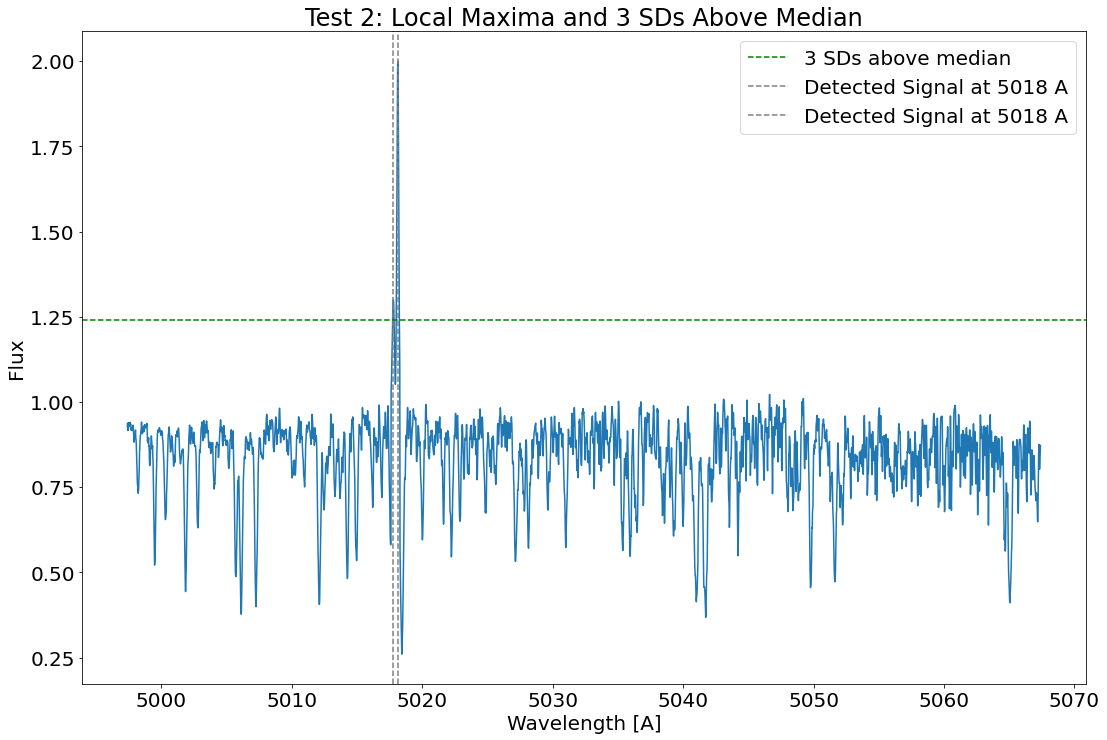

In [207]:
for idx in idxs1:            
    # second test: keep the index if it is a local maximum  
    if spect[idx] >= spect[idx-1] and spect[idx] >= spect[idx+1]: 
        if spect[idx] >= spect[idx-2] and spect[idx] >= spect[idx+2]:
            idxs2 = idxs2 + [idx]
if (plot == True or save_figs == True) & (idxs2 != []):
    fig = plt.figure()
    plt.plot(wl, spect)
    plt.axhline(3*SD + median, label= '3 SDs above median', color='green', linestyle='--')
    for ind in idxs2:
        plt.axvline(x=wl[ind], label= 'Detected Signal at ' + str(round(wl[ind])) + ' A', color='gray', linestyle='--')    
    plt.title('Test 2: Local Maxima and 3 SDs Above Median')
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux')
    plt.legend() 
    if plot == True:
        plt.show()
    if save_figs == True:
        path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/LaserDetectionResults/' + star
        if not (os.path.isdir(path)):
            os.mkdir(path)
        path = path + '/order' + str(order)
        if not (os.path.isdir(path)):
            os.mkdir(path)
        fig.savefig(path + '/' + star + '_order' + str(order) + '_test2.png')

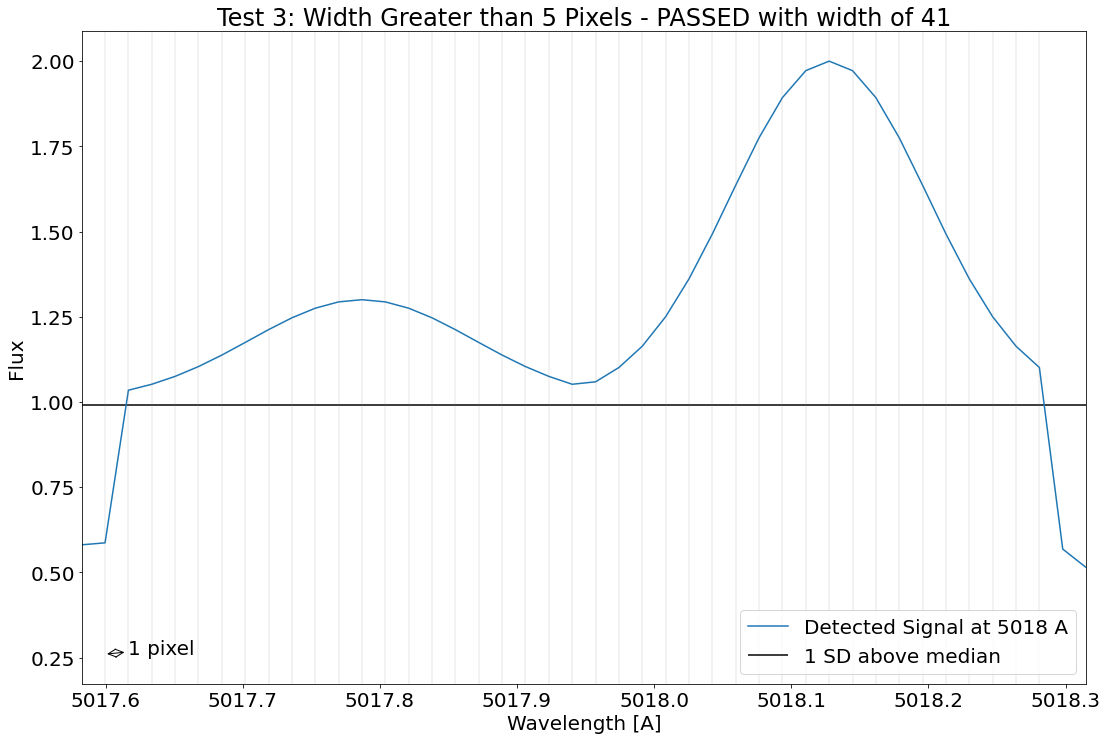

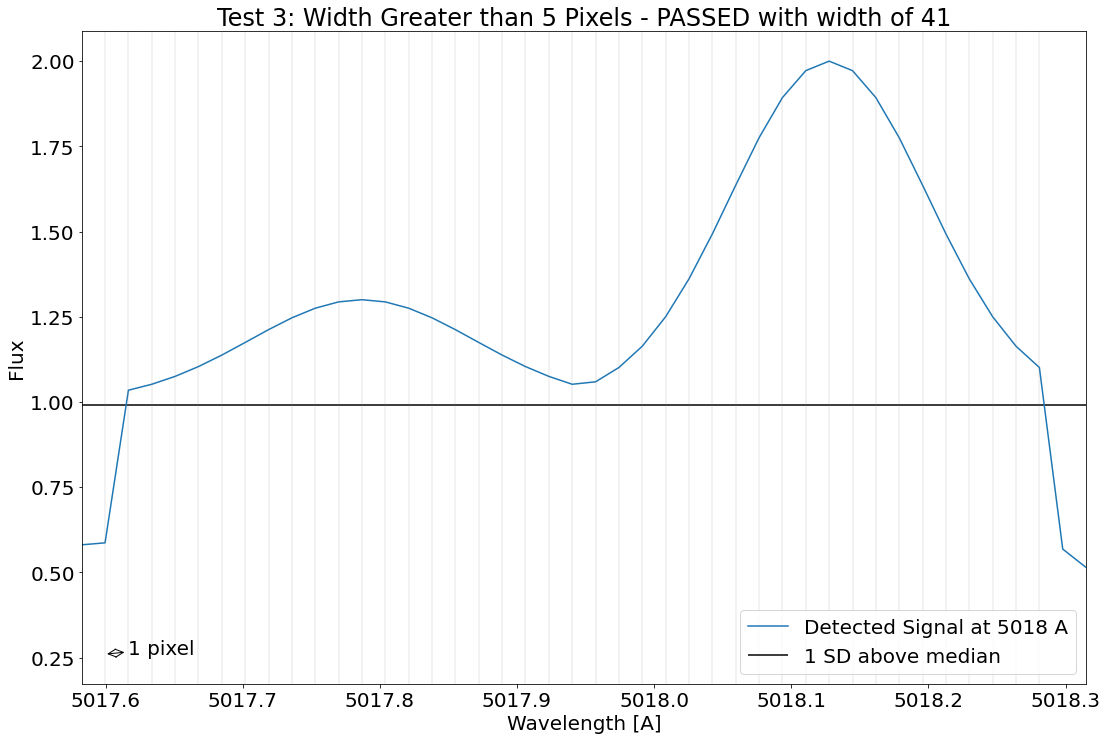

In [208]:
for idx in idxs2:
    # third test: determine if the signal is greater than 5 pixels in width 
    # determine the left and right bounds of the peak - the left and rightmost points where
    # the flux value falls under the median + 1 SD     
    temp_ind = idx
    left_bound = 0
    while temp_ind > 0:
        temp_ind -= 1
        if spect[temp_ind] < median + SD:
            left_bound = temp_ind
            break
    temp_ind = idx
    right_bound = len(spect)
    while temp_ind < len(spect):
        temp_ind += 1
        if spect[temp_ind] < median + SD:
            right_bound = temp_ind
            break
    passed = False
    if ((right_bound - left_bound) > 5):
        passed = True
        idxs3 = idxs3 + [idx]
    if (plot == True or save_figs == True):
        fig = plt.figure()
        plt.plot(wl, spect, label = 'Detected Signal at ' + str(round(wl[idx])) + ' A') 
        if passed:
            plt.title('Test 3: Width Greater than 5 Pixels - PASSED with width of ' + str(right_bound - left_bound))
        else:
            plt.title('Test 3: Width Greater than 5 Pixels - FAILED with width of ' + str(right_bound - left_bound))
        plt.xlabel('Wavelength [A]')
        plt.xlim(wl[left_bound - 1], wl[right_bound + 1])
        plt.hlines(median + SD, wl[left_bound - 1], wl[right_bound + 1], label = '1 SD above median')
        for ind in np.arange(left_bound, right_bound):
            plt.axvline(x=wl[ind], color='gray', linestyle='-', linewidth=0.2)
        plt.annotate(s='1 pixel', xy=(wl[left_bound], min(spect)), xytext=(wl[left_bound + 1], min(spect)), arrowprops=dict(arrowstyle='<->'))
        plt.ylabel('Flux')
        plt.legend()
    if plot == True:
        plt.show()
    if save_figs == True:
        test3_path = path + '/test3'
        if not (os.path.isdir(test3_path)):
            os.mkdir(test3_path)
        pos_path = test3_path + '/pass'
        neg_path = test3_path + '/fail'
        if not (os.path.isdir(pos_path) and os.path.isdir(neg_path)):
            os.mkdir(pos_path)
            os.mkdir(neg_path)
        if passed:
            fig.savefig(pos_path + '/test3' + '_' + str(round(wl[idx])) + '.png')
        else:
            fig.savefig(neg_path + '/test3' + '_' + str(round(wl[idx])) + '.png')

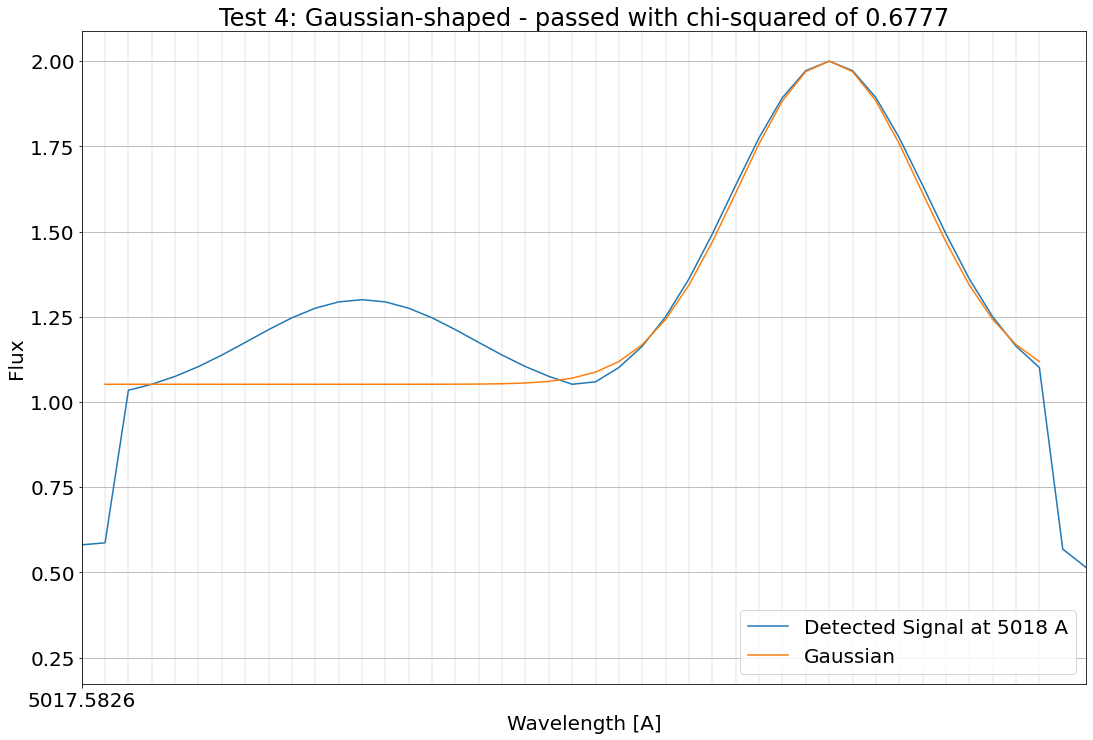

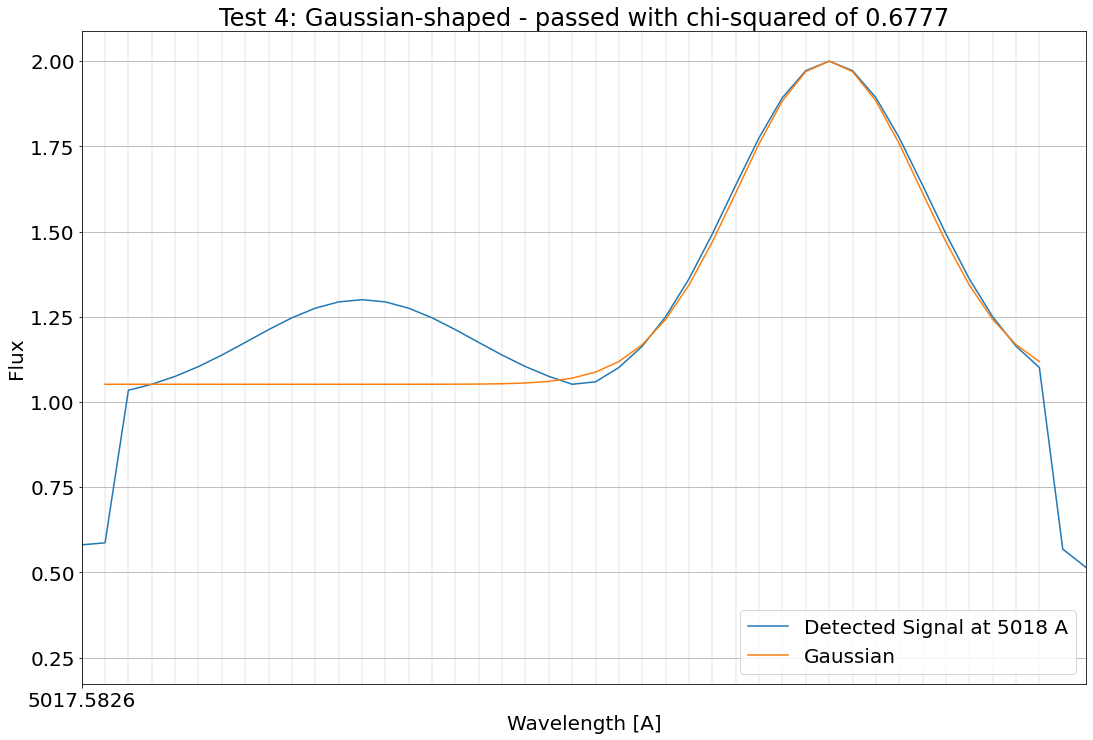

In [209]:
for idx in idxs3:
    # fourth test: fit a gaussian to the peak, see how much signal resembles a gaussian
    temp_ind = idx
    left_bound = 0
    while temp_ind > 0:
        temp_ind -= 1
        if spect[temp_ind] < median:
            left_bound = temp_ind
            break
    temp_ind = idx
    right_bound = len(spect)
    while temp_ind < len(spect):
        temp_ind += 1
        if spect[temp_ind] < median:
            right_bound = temp_ind
            break

    x = wl[left_bound:right_bound]
    y = spect[left_bound:right_bound]
    max_y = max(y)
    min_y = np.percentile(y, 5) 
    height = max_y - min_y
    ind = y.tolist().index(max_y)
    pos = x[ind]
    min_width = x[int((len(x) / 2) + 1)] - x[int((len(x) / 2))]
    max_width = x[len(x) - 1] - x[0]
    width_spacing = 0.01

    chi_squared_values = []
    width_vals = np.arange(min_width, max_width, width_spacing)
    for w in width_vals:
        gaus = gaussian(x, height, pos, w, min_y)
        chi_squared = chi(gaus, y)
        chi_squared_values = np.append(chi_squared_values, chi_squared)
    min_chi_squared = min(chi_squared_values)
    ind_of_min_chisquared = chi_squared_values.tolist().index(min_chi_squared)
    width = width_vals[ind_of_min_chisquared]
    gaus = gaussian(x, height, pos, width, min_y)
    passed = False

    if min_chi_squared < 100:
        passed = True
        idxs4 = idxs4 + [idx]

    if plot == True or save_figs == True:
        fig = plt.figure()
        plt.plot(wl, spect, label = 'Detected Signal at ' + str(round(wl[idx])) + ' A')
        plt.plot(x, gaus, label = 'Gaussian')
        if passed == True:
            plt.title('Test 4: Gaussian-shaped - passed with chi-squared of ' + str(round(min_chi_squared, 4)))
        else:
            plt.title('Test 4: Gaussian-shaped - failed with chi-squared of ' + str(round(min_chi_squared, 4)))
        plt.xlabel('Wavelength [A]')
        plt.xlim(wl[left_bound - 1], wl[right_bound + 1])
        plt.ylabel('Flux')
        plt.xticks(np.arange(wl[left_bound - 1], wl[right_bound + 1]))
        plt.grid(which = 'both')
        for ind in np.arange(left_bound, right_bound):
            plt.axvline(x=wl[ind], color='gray', linestyle='-', linewidth=0.2)
        plt.legend()
        if plot == True:
            plt.show()
        if save_figs == True:
            test4_path = path + '/test4'
            if not (os.path.isdir(test4_path)):
                os.mkdir(test4_path)
            pos_path = test4_path + '/pass'
            neg_path = test4_path + '/fail'
            if not (os.path.isdir(pos_path) and os.path.isdir(neg_path)):
                os.mkdir(pos_path)
                os.mkdir(neg_path)
            if passed:
                fig.savefig(pos_path + '/test4' + '_' + str(round(wl[idx])) + '.png')
            else:
                fig.savefig(neg_path + '/test4' + '_' + str(round(wl[idx])) + '.png')


In [210]:
if threshold_testing == True:               
    for idx in idxs4:    
        absolute_difference_function = lambda list_value : abs(list_value - idx)
        i = min(indicies.tolist(), key = absolute_difference_function)
        index = indicies.tolist().index(i)
        if abs(idx - indicies[index]) < 3 and (indicies[index] not in recovered_indicies):
            recovered_widths = np.append(recovered_widths, widths[index])
            recovered_heights = np.append(recovered_heights, heights[index])
            recovered_indicies = np.append(recovered_indicies, indicies[index])

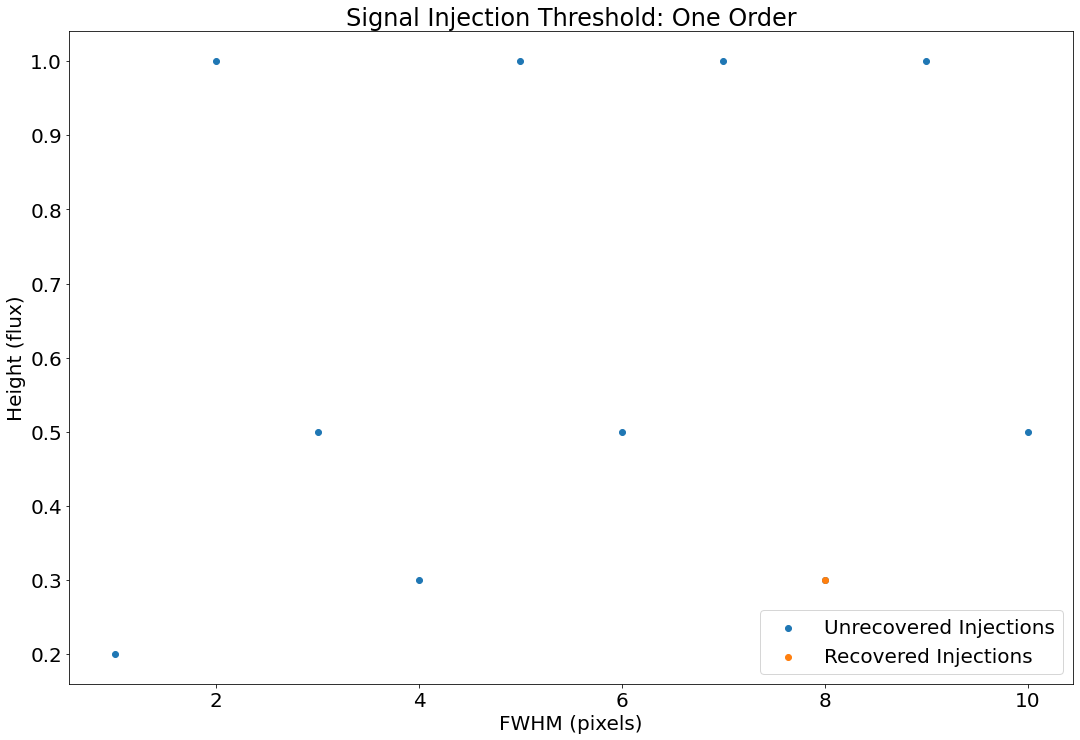

In [211]:
if threshold_testing == True and plot == True or save_figs == True:
    fig = plt.figure()
    plt.scatter(widths, heights, label = 'Unrecovered Injections') 
    plt.scatter(recovered_widths, recovered_heights, label = 'Recovered Injections')
    plt.xlabel('FWHM (pixels)')
    plt.ylabel('Height (flux)')
    plt.title('Signal Injection Threshold: One Order')
    plt.legend()
    if plot == True:
        plt.show()
    if save_figs == True:
        threshold_path = path + '/' + star + 'threshold'
        fig.savefig(threshold_path)